In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("D:\power bi project\INTERNSHIP PROJECT\data science ml projrct\Fraud.csv")

In [3]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df.shape


(6362620, 11)

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<Axes: xlabel='isFraud', ylabel='count'>

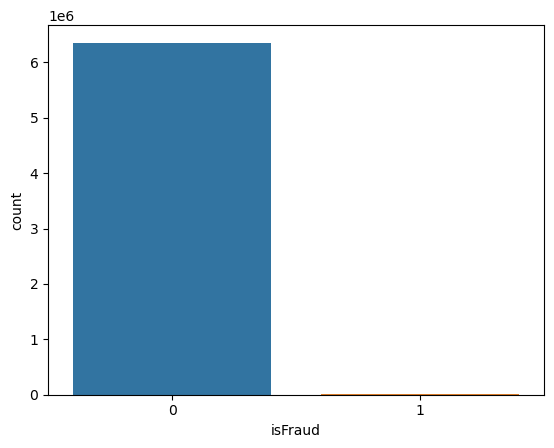

In [10]:
sns.countplot(x='isFraud',data=df)

In [11]:
a=df['type'].unique()
print(a)

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [12]:
label_encoder = preprocessing.LabelEncoder() 
df['type']= label_encoder.fit_transform(df['type']) 
df['type'].unique()

array([3, 4, 1, 2, 0])

3-PAYMENT , 4- TRANSFER, 1-CASH_OUT , 2-DEBIT , 0-CASH_IN


In [13]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
df=df.drop(columns=['nameOrig'])

In [15]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
df=df.drop(columns=['nameDest'])

In [17]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [18]:
df.shape

(6362620, 9)

In [19]:
corr_matrix=df.corr()
print(corr_matrix.iloc[1].sort_values(ascending=False))

type              1.000000
amount            0.088419
isFraud           0.020833
step              0.006635
isFlaggedFraud    0.002685
newbalanceDest   -0.059364
oldbalanceDest   -0.104679
oldbalanceOrg    -0.339760
newbalanceOrig   -0.352758
Name: type, dtype: float64


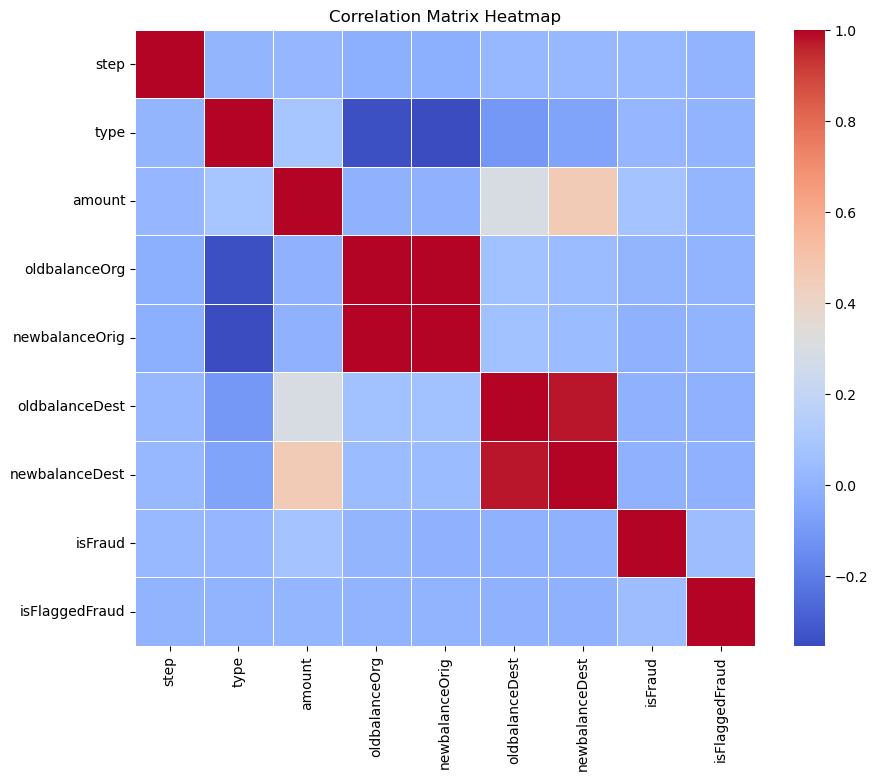

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
df=df[['type','amount','isFraud','step','isFlaggedFraud']]
df.head()

,type,amount,isFraud,step,isFlaggedFraud
0,3,9839.64,0,1,0
1,3,1864.28,0,1,0
2,4,181.00,1,1,0
3,1,181.00,1,1,0
4,3,11668.14,0,1,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int32  
 1   amount          float64
 2   isFraud         int64  
 3   step            int64  
 4   isFlaggedFraud  int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 218.4 MB


In [24]:
column_to_convert = 'amount'
df[column_to_convert] = df[column_to_convert].astype(int)

In [25]:
df.head()

,type,amount,isFraud,step,isFlaggedFraud
0,3,9839,0,1,0
1,3,1864,0,1,0
2,4,181,1,1,0
3,1,181,1,1,0
4,3,11668,0,1,0


# model training

In [26]:
X = df.drop(columns='isFraud', axis=1)
Y = df['isFraud']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [29]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [30]:
X_pred = model.predict(X_test)
accuracy = accuracy_score(X_pred, Y_test)
print("Accuracy of model", accuracy)

Accuracy of model 0.9986955059393772
